# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
data = pd.read_csv('cleaned_salary_schedule_2024.csv')

In [3]:
data

,Paystep,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,1A,64789,66964,70983,72832,76848,75009,80873
1,1B,64789,66964,70983,72832,76848,75009,80873
2,2A,66078,68253,72272,74121,78137,76298,82162
3,2B,66078,68253,72272,74121,78137,76298,82162
4,3A,66623,68798,72817,74666,78682,76843,82707
5,3B,66623,68798,72817,74666,78682,76843,82707
6,4A,67588,69763,73782,75631,79647,77808,83672
7,4B,67588,69763,73782,75631,79647,77808,83672
8,5A,68422,70597,74616,76465,80481,78642,84506
9,5B,68422,70597,74616,76465,80481,78642,84506


In [4]:
data[data['Paystep'].str.contains('A')].select_dtypes(include='number').pct_change(axis=0).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.02,0.02,0.02,0.02,0.02,0.02
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,0.01,0.01,0.01,0.01,0.01,0.01,0.01
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01
10,0.01,0.01,0.01,0.01,0.01,0.01,0.01
11,0.02,0.02,0.02,0.02,0.02,0.02,0.02
14,0.03,0.02,0.02,0.02,0.02,0.02,0.02
15,0.02,0.02,0.02,0.02,0.02,0.02,0.02
18,0.10,0.09,0.09,0.09,0.08,0.09,0.08


In [5]:
data[data['Paystep'].str.contains('A')].select_dtypes(include='number').pct_change(axis=1).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
0,NaN,0.03,0.06,0.03,0.06,-0.02,0.08
2,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
4,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
6,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
8,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
10,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
11,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
14,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
15,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
18,NaN,0.03,0.05,0.02,0.05,-0.02,0.06


In [6]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').pct_change().round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.02,0.02,0.02,0.02,0.02,0.02
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01
7,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01
12,0.03,0.03,0.03,0.03,0.03,0.03,0.03
13,0.02,0.02,0.02,0.02,0.02,0.02,0.02
16,0.07,0.07,0.06,0.06,0.06,0.06,0.06
17,0.02,0.02,0.02,0.02,0.02,0.02,0.01
20,0.10,0.10,0.09,0.09,0.09,0.09,0.08


In [7]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').pct_change(axis=1).round(2)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,0.03,0.06,0.03,0.06,-0.02,0.08
3,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
5,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
7,NaN,0.03,0.06,0.03,0.05,-0.02,0.08
9,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
12,NaN,0.03,0.06,0.02,0.05,-0.02,0.07
13,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
16,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
17,NaN,0.03,0.05,0.02,0.05,-0.02,0.07
20,NaN,0.03,0.05,0.02,0.04,-0.02,0.06


In [8]:
df = read_and_filter_data()

c:\Users\chris\OneDrive\Desktop\Anias\Teacher_Payroll_Analysis\src\wrangle.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Decrease Flag'].iloc[df.groupby('FirstMidLastStart').head(1).index]=0


In [9]:
df[(df['Paystep']==1)].sort_values('Salary').head()

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
109154,2023,JerryOWilkie2023-02-06,2023-02-06,2023,2022,0,0-5,1,B,61070.0,60k-80k,0.0,0.0,<-5%,<-5k
135202,2023,KieranCreighton2023-05-31,2023-05-31,2023,2022,0,0-5,1,B,61070.0,60k-80k,0.0,0.0,<-5%,<-5k
237206,2023,ThaliaBolanos2023-01-09,2023-01-09,2023,2022,0,0-5,1,B,61070.0,60k-80k,0.0,0.0,<-5%,<-5k
130389,2023,KathyLQuattlebaum2023-02-27,2023-02-27,2023,2022,0,0-5,1,B,61070.0,60k-80k,0.0,0.0,<-5%,<-5k
125191,2023,KaitlinSenitt-Escobar2022-12-16,2022-12-16,2022,2022,1,0-5,1,A,61070.0,60k-80k,0.0,0.0,<-5%,<-5k


In [10]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').diff() - (65.60*24)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-285.4,-285.4,-285.4,-285.4,-285.4,-285.4,-285.4
5,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4,-1029.4
7,-609.4,-609.4,-609.4,-609.4,-609.4,-609.4,-609.4
9,-740.4,-740.4,-740.4,-740.4,-740.4,-740.4,-740.4
12,595.6,595.6,595.6,595.6,595.6,595.6,595.6
13,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4
16,3373.6,3373.6,3373.6,3373.6,3373.6,3373.6,3373.6
17,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4,-209.4
20,6112.6,6112.6,6112.6,6112.6,6112.6,6112.6,6112.6


In [11]:
data[data['Paystep'].str.contains('B')].select_dtypes(include='number').diff(axis=1) - (65.60*24)

,BAC1,BA+30C2,C2+ID,C2+PD,C2+ID+PD,MA+30C6,MA+30C6+PD
1,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
3,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
5,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
7,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
9,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
12,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
13,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
16,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
17,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6
20,NaN,600.6,2444.6,274.6,2441.6,-3413.4,4289.6


In [12]:
df[(df['Salary Monetary Diff'] - (65.60*24)) <= 0].sort_values('Salary Monetary Diff', ascending=False)

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
232188,2019,SusanMJaquish2012-09-04,2012-09-04,2012,2012,7,6-10,12,A,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
201770,2019,RachelleGarcia2008-08-28,2008-08-28,2008,2008,11,11-15,16,A,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
177239,2019,MichealLRice2008-08-28,2008-08-28,2008,2008,11,11-15,16,A,79903.0,60k-80k,2.00,1567.0,0-5%,0-5k
185690,2020,NatalieKavral2013-09-03,2013-09-03,2013,2013,7,6-10,11,A,63865.0,60k-80k,2.50,1557.0,0-5%,0-5k
169894,2019,MeganELetavish2017-09-05,2017-09-05,2017,2017,2,0-5,7,A,78684.0,60k-80k,2.00,1543.0,0-5%,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119466,2023,JosephCarbone1996-09-03,1996-09-03,1996,1996,27,26-30,28,A,77194.0,60k-80k,-40.00,-51463.0,<-5%,<-5k
19285,2022,AnthonyBright1998-02-11,1998-02-11,1998,1997,24,21-25,26,B,77194.0,60k-80k,-40.00,-51463.0,<-5%,<-5k
157568,2019,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,2000,18,16-20,23,B,62430.0,60k-80k,-45.48,-52079.0,<-5%,<-5k
151112,2023,LizandraDelacruz Santia1999-09-07,1999-09-07,1999,1999,24,21-25,25,A,77194.0,60k-80k,-40.59,-52730.0,<-5%,<-5k


In [13]:
df[df['Years of Employment']>=8].sort_values('Salary Monetary Diff', ascending=False)

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
157569,2020,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,2000,19,16-20,23,B,120606.0,120k-140k,93.19,58176.0,50-100%,50k-60k
216927,2021,SantinaCammariere2000-09-05,2000-09-05,2000,2000,21,21-25,24,A,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
231596,2021,SusanAPenfield2000-08-28,2000-08-28,2000,2000,21,21-25,24,A,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
189020,2023,NicoleEverett1988-04-18,1988-04-18,1988,1987,35,31-35,36,B,128657.0,120k-140k,80.47,57367.0,50-100%,50k-60k
81670,2023,FredericaDe Leo2001-09-04,2001-09-04,2001,2001,22,21-25,23,A,122424.0,120k-140k,83.24,55614.0,50-100%,50k-60k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118417,2023,JordanaSGoodman1998-09-08,1998-09-08,1998,1998,25,21-25,26,A,77194.0,60k-80k,-40.00,-51463.0,<-5%,<-5k
223939,2023,ShevaughnaMWright1995-09-05,1995-09-05,1995,1995,28,26-30,29,A,77194.0,60k-80k,-40.00,-51463.0,<-5%,<-5k
157568,2019,MargaretMGiustino Desimo2001-03-12,2001-03-12,2001,2000,18,16-20,23,B,62430.0,60k-80k,-45.48,-52079.0,<-5%,<-5k
151112,2023,LizandraDelacruz Santia1999-09-07,1999-09-07,1999,1999,24,21-25,25,A,77194.0,60k-80k,-40.59,-52730.0,<-5%,<-5k


In [14]:
df[df['FirstMidLastStart']=='SantinaCammariere2000-09-05']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
216925,2019,SantinaCammariere2000-09-05,2000-09-05,2000,2000,19,16-20,24,A,105469.0,100k-120k,3.39,3460.0,0-5%,0-5k
216926,2020,SantinaCammariere2000-09-05,2000-09-05,2000,2000,20,16-20,24,A,64864.0,60k-80k,-38.50,-40605.0,<-5%,<-5k
216927,2021,SantinaCammariere2000-09-05,2000-09-05,2000,2000,21,21-25,24,A,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
216928,2022,SantinaCammariere2000-09-05,2000-09-05,2000,2000,22,21-25,24,A,122424.0,120k-140k,0.00,0.0,<-5%,<-5k
216929,2023,SantinaCammariere2000-09-05,2000-09-05,2000,2000,23,21-25,24,A,128657.0,120k-140k,5.09,6233.0,5-10%,5k-10k


In [15]:
df[df['FirstMidLastStart']=='AileenAlvarado1998-02-23']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
2735,2019,AileenAlvarado1998-02-23,1998-02-23,1998,1997,21,21-25,26,B,65268.0,60k-80k,12.89,7451.0,10-15%,5k-10k
2736,2020,AileenAlvarado1998-02-23,1998-02-23,1998,1997,22,21-25,26,B,111500.0,100k-120k,70.83,46232.0,50-100%,40k-50k
2737,2021,AileenAlvarado1998-02-23,1998-02-23,1998,1997,23,21-25,26,B,121078.0,120k-140k,8.59,9578.0,5-10%,5k-10k
2738,2022,AileenAlvarado1998-02-23,1998-02-23,1998,1997,24,21-25,26,B,121078.0,120k-140k,0.00,0.0,<-5%,<-5k
2739,2023,AileenAlvarado1998-02-23,1998-02-23,1998,1997,25,21-25,26,B,121078.0,120k-140k,0.00,0.0,<-5%,<-5k


In [34]:
df[df['FirstMidLastStart']=='SusanAPenfield2000-08-28']

,Fiscal Year,FirstMidLastStart,Hire Date,Hire Year,Fiscal Year of Hire,Years of Employment,Employment Category,Paystep,Paystep Letter,Salary,Salary Category,Salary Delta,Salary Monetary Diff,Salary Delta Category,Salary Monetary Diff Category
231594,2019,SusanAPenfield2000-08-28,2000-08-28,2000,2000,19,16-20,24,A,105469.0,100k-120k,3.39,3460.0,0-5%,0-5k
231595,2020,SusanAPenfield2000-08-28,2000-08-28,2000,2000,20,16-20,24,A,64864.0,60k-80k,-38.50,-40605.0,<-5%,<-5k
231596,2021,SusanAPenfield2000-08-28,2000-08-28,2000,2000,21,21-25,24,A,122424.0,120k-140k,88.74,57560.0,50-100%,50k-60k
231597,2022,SusanAPenfield2000-08-28,2000-08-28,2000,2000,22,21-25,24,A,122424.0,120k-140k,0.00,0.0,<-5%,<-5k
231598,2023,SusanAPenfield2000-08-28,2000-08-28,2000,2000,23,21-25,24,A,128657.0,120k-140k,5.09,6233.0,5-10%,5k-10k


In [ ]:
df

In [18]:
print(f'Annual United Teachers Federation Dues: ${round(65.60*24,2)}')

Annual United Teachers Federation Dues: $1574.4


In [32]:
pd.crosstab(df['Paystep'], df['Paystep Letter'])

Paystep Letter,A,B
Paystep,,
1,15,114
2,1091,287
3,3657,351
4,1611,541
5,5346,799
6,8566,1322
7,9958,1750
8,10399,1696
9,10249,1668


In [20]:
df.head(2).T

,0,1
Fiscal Year,2019,2020
FirstMidLastStart,A DilanganiDilrukshi2011-09-01,A DilanganiDilrukshi2011-09-01
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Year,2011,2011
Fiscal Year of Hire,2011,2011
Years of Employment,8,9
Employment Category,6-10,6-10
Paystep,13,13
Paystep Letter,A,A
Salary,79005.0,89263.0


In [21]:
df.tail(2).T

,254475,254476
Fiscal Year,2022,2023
FirstMidLastStart,ZyliDabi2008-08-28,ZyliDabi2008-08-28
Hire Date,2008-08-28 00:00:00,2008-08-28 00:00:00
Hire Year,2008,2008
Fiscal Year of Hire,2008,2008
Years of Employment,14,15
Employment Category,11-15,11-15
Paystep,16,16
Paystep Letter,A,A
Salary,104145.0,104145.0


In [22]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,254477.0,2021.0,2019.0,2020.0,2021.0,2022.0,2023.0,1.0
Hire Date,254477,2006-11-06 05:50:21.712767488,1980-02-01 00:00:00,2000-06-14 00:00:00,2006-08-31 00:00:00,2014-09-02 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,254477.0,2006.0,1980.0,2000.0,2006.0,2014.0,2023.0,9.0
Fiscal Year of Hire,254477.0,2006.0,1979.0,1999.0,2006.0,2014.0,2022.0,9.0
Years of Employment,254477.0,15.0,0.0,7.0,15.0,21.0,43.0,9.0
Paystep,254477.0,18.0,1.0,10.0,18.0,24.0,44.0,9.0
Salary,254477.0,97807.0,49385.0,83924.0,98644.0,111350.0,148657.0,19315.0
Salary Delta,254477.0,4.0,-45.0,0.0,3.0,5.0,101.0,6.0
Salary Monetary Diff,254477.0,3623.0,-56610.0,0.0,2602.0,5438.0,58176.0,4951.0


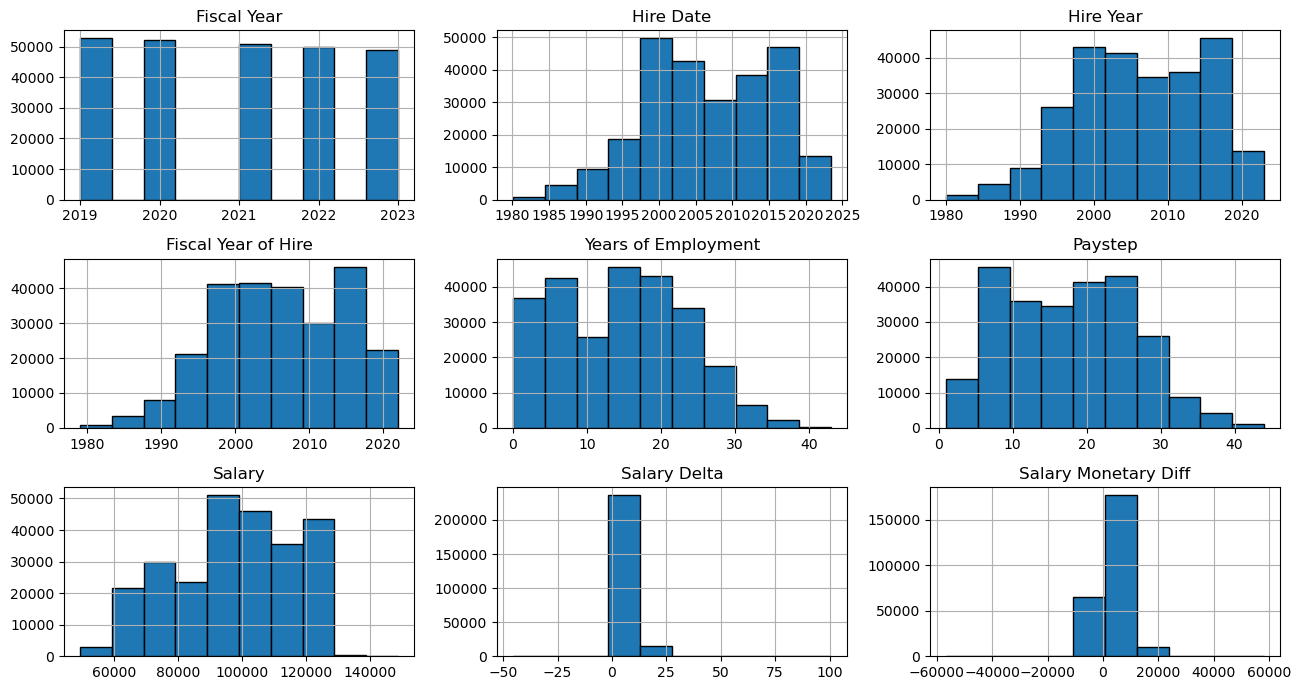

In [23]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [24]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

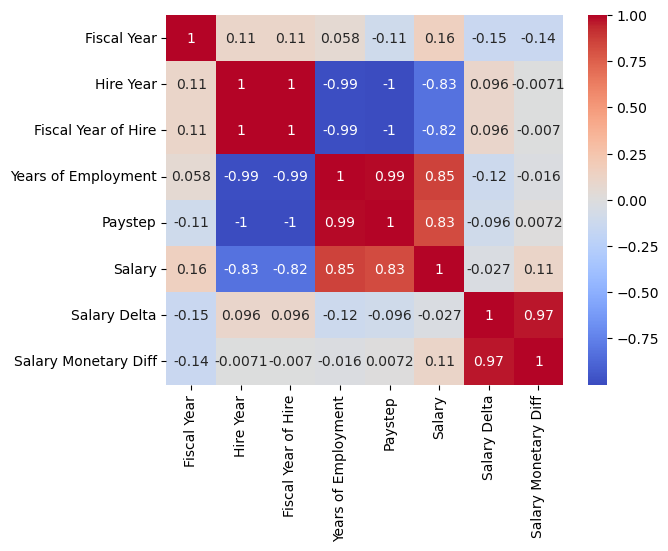

In [25]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');

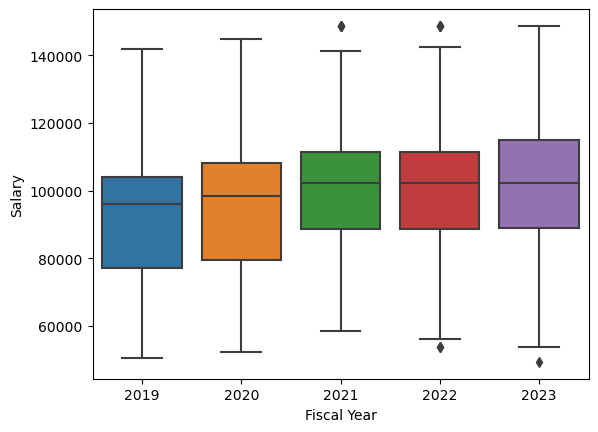

In [26]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

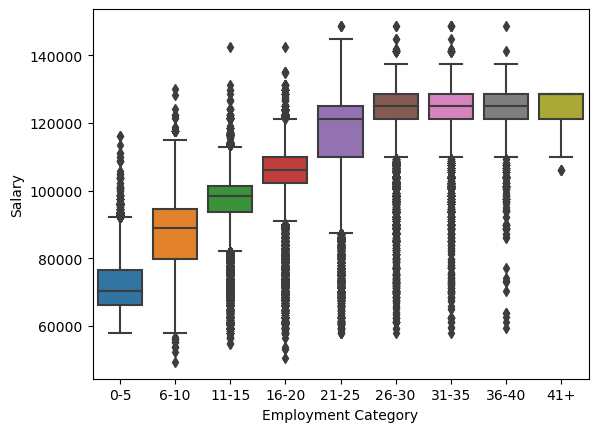

In [27]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

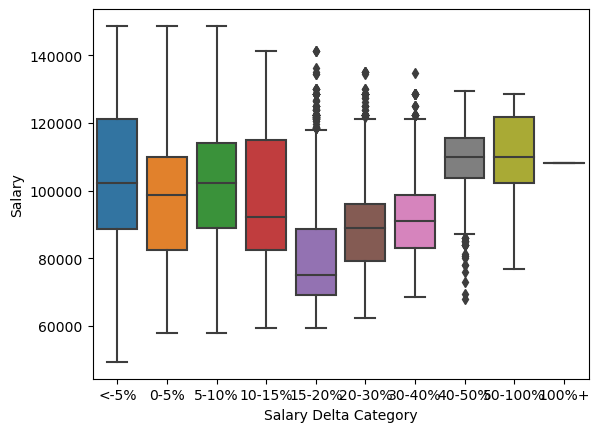

In [28]:
sns.boxplot(data=df, y='Salary', x='Salary Delta Category');

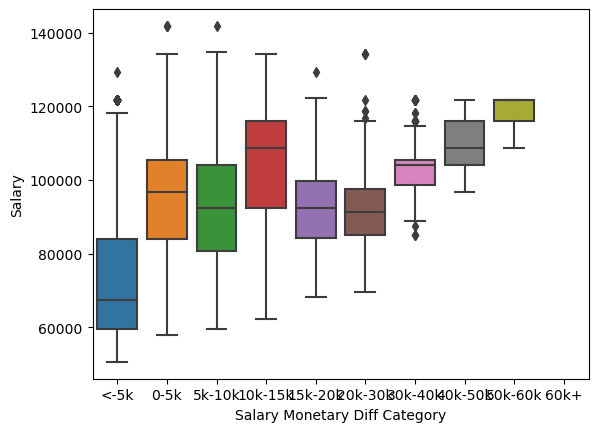

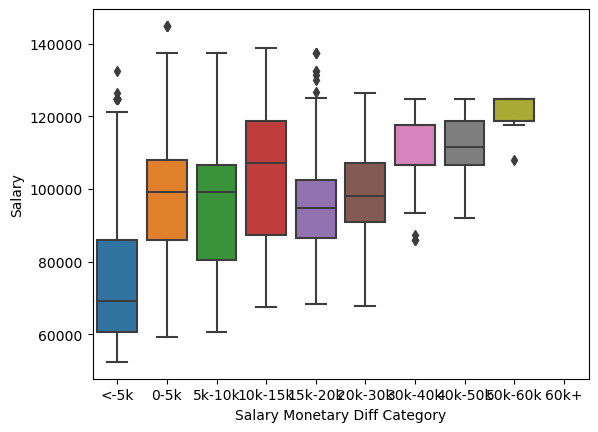

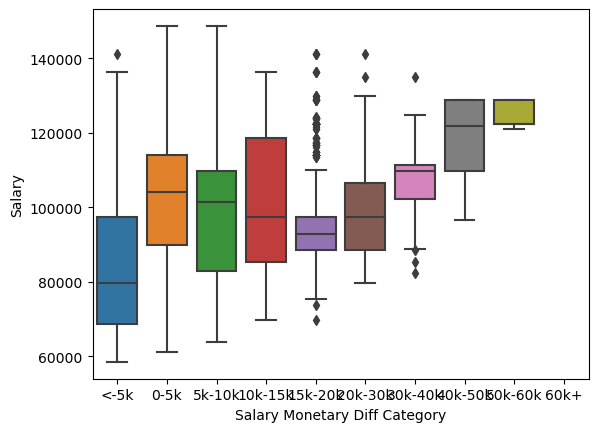

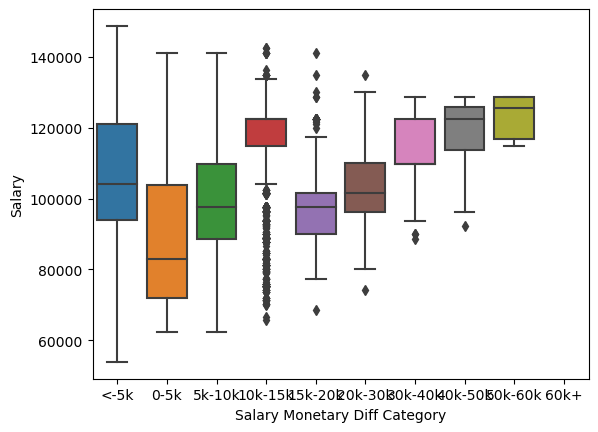

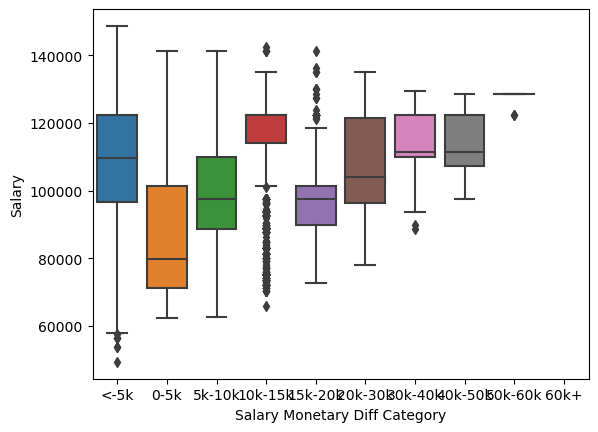

In [38]:
years = [2019,2020,2021,2022,2023]

for y in years:
    sns.boxplot(data=df[df['Fiscal Year']==y], y='Salary', x='Salary Monetary Diff Category')
    plt.show();

In [30]:
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))

In [48]:
pd.crosstab(df['Fiscal Year'], df['Salary Delta Category'],
            normalize='index',)

Salary Delta Category,<-5%,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Fiscal Year,,,,,,,,,,
2019,0.090204,0.632015,0.145358,0.089938,0.027065,0.010375,0.001214,0.002371,0.001460,0.000000
2020,0.073526,0.606290,0.181034,0.099338,0.025295,0.009339,0.001074,0.002301,0.001783,0.000019
2021,0.042892,0.594530,0.191402,0.113173,0.036163,0.014678,0.002617,0.002499,0.002046,0.000000
2022,0.545774,0.220521,0.161784,0.054443,0.009452,0.004776,0.000903,0.001605,0.000742,0.000000
2023,0.546905,0.221369,0.159612,0.049704,0.011113,0.005557,0.001307,0.002574,0.001859,0.000000


In [50]:
pd.crosstab(df['Employment Category'], df['Salary Delta Category'],
            normalize='index',)

Salary Delta Category,<-5%,0-5%,5-10%,10-15%,15-20%,20-30%,30-40%,40-50%,50-100%,100%+
Employment Category,,,,,,,,,,
0-5,0.259933,0.515742,0.068267,0.079153,0.059999,0.014288,0.001917,0.000577,0.000124,0.000000
6-10,0.224273,0.324596,0.214109,0.169219,0.040210,0.023314,0.002652,0.000892,0.000736,0.000000
11-15,0.198541,0.534684,0.207645,0.039168,0.010913,0.005673,0.001378,0.000918,0.001080,0.000000
16-20,0.236488,0.530929,0.182158,0.033277,0.005622,0.003471,0.000906,0.004754,0.002396,0.000000
21-25,0.262744,0.358116,0.240645,0.124718,0.003087,0.002863,0.000962,0.003355,0.003489,0.000022
26-30,0.413840,0.481215,0.070572,0.025922,0.001827,0.001028,0.000228,0.003540,0.001827,0.000000
31-35,0.346021,0.577993,0.052595,0.017024,0.001661,0.001522,0.000554,0.001661,0.000969,0.000000
36-40,0.405371,0.536445,0.042839,0.014066,0.000639,0.000000,0.000000,0.000000,0.000639,0.000000
41+,0.771429,0.157143,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
